In [1]:
#importing
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#scipy stuff
from scipy.optimize import minimize, curve_fit

1\. **2D minimization of a six-hump camelback function**

$$f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2$$

has multiple global and local minima.

- Find the global minima of this function
- How many global minima are there, and what is the function value at those points?
- What happens for an initial guess of $(x, y) = (0, 0)$?

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use `numpy.meshgrid()` and `pylab.imshow()` to find visually the regions.
* Use `scipy.optimize.minimize()`, optionally trying its optional arguments.

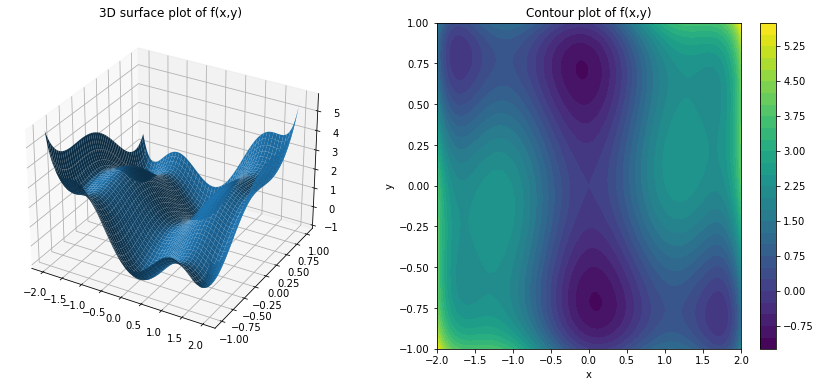

In [2]:
def camel(x): # functions need to have a single input which is a vector
    return (x[0]**2)*(4 - 2.1*x[0]**2 + (x[0]**4)/3) + x[0]*x[1] + (x[1]**2)*(4*x[1]**2 - 4)

N = 200 # resolution
x = np.linspace(-2,2,N)
y = np.linspace(-1,1,N)

xx,yy = np.meshgrid(x,y)
zz = camel(np.array([xx,yy]))

with plt.rc_context({'figure.figsize' : [15,6]}):  # in order to get bigger figure for this plot
    fig = plt.figure()
    ax3d = fig.add_subplot(1,2,1,projection='3d')
    axim = fig.add_subplot(1,2,2)
    ax3d.plot_surface(xx,yy,zz)
    cs=axim.contourf(xx,yy,zz,30)
    cbar = fig.colorbar(cs)
    ax3d.set_title("3D surface plot of f(x,y)")
    axim.set_title("Contour plot of f(x,y)")
    axim.set_xlabel('x')
    axim.set_ylabel('y')
    plt.show()



Minima found starting from the origin (BFGS ALGORITHM): [0. 0.]
Optimization terminated successfully.
Minima found starting from the origin (POWELL ALGORITHM): [-0.08984201  0.71265634]
Optimization terminated successfully.

 ------- 

Attempt starting from initial guess [-1.75  0.75]
Minimum found: [-1.70360665  0.79608374]
Optimization terminated successfully.

 ------- 

Attempt starting from initial guess [0.   0.75]
Minimum found: [-0.08984202  0.71265641]
Optimization terminated successfully.

 ------- 

Attempt starting from initial guess [1.6 0.6]
Minimum found: [1.60710462 0.56865207]
Optimization terminated successfully.

 ------- 

Attempt starting from initial guess [-1.5 -0.6]
Minimum found: [-1.60710477 -0.56865142]
Optimization terminated successfully.

 ------- 

Attempt starting from initial guess [ 0.   -0.75]
Minimum found: [ 0.08984201 -0.71265642]
Optimization terminated successfully.

 ------- 

Attempt starting from initial guess [ 1.75 -0.8 ]
Minimum found: [ 1.

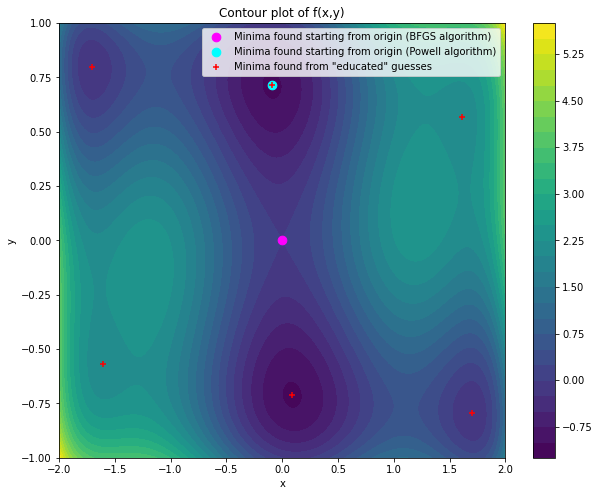

Global minima found:  [-0.08984202  0.71265641]


In [3]:
# first thing we try optimization starting from the origin

result_origin = minimize(camel,np.array([0.,0.]))
print("Minima found starting from the origin (BFGS ALGORITHM): {}".format(result_origin.x))
print(result_origin.message)

# its a saddle point, apparently the algorithm gets stuck
# trying a different minimization algorithm:

result_origin_powell = minimize(camel,np.array([0.,0.]),method='Powell')
print("Minima found starting from the origin (POWELL ALGORITHM): {}".format(result_origin_powell.x))
print(result_origin_powell.message)


# now we define initial guesses based on the plot

# (x,y)
guesses = np.array([
    (-1.75,0.75),
    (0.,0.75),
    (1.6,0.6),
    (-1.5,-0.6),
    (0.,-0.75),
    (1.75,-0.8)
])
results = []


for guess in guesses:
    # default minimization algorithm is BFGS
    result=minimize(camel,guess) # each result is a OptimizeResult object
    results.append(result.x)
   
    print("\n ------- \n")
    print("Attempt starting from initial guess {}".format(guess,result.success))
    print("Minimum found: {}".format(result.x))
    print(result.message)

#PLOTTING MINIMA

with plt.rc_context({'figure.figsize' : [10,8]}):  # in order to get bigger figure for this plot
    fig = plt.figure()
    axim = fig.add_subplot()
    cs=axim.contourf(xx,yy,zz,30)
    cbar = fig.colorbar(cs)
    axim.set_title("Contour plot of f(x,y)")
    axim.set_xlabel('x')
    axim.set_ylabel('y')
    axim.scatter(result_origin.x[0],result_origin.x[1],color='magenta',s=75,label='Minima found starting from origin (BFGS algorithm)')
    axim.scatter(result_origin_powell.x[0],result_origin_powell.x[1],color='cyan',s=75,label='Minima found starting from origin (Powell algorithm)')
    axim.scatter(np.array(results)[:,0],np.array(results)[:,1],color='r',marker='+',label='Minima found from "educated" guesses')
    axim.legend()
    plt.show()


print("Global minima found: ",results[np.argmin(camel(results))])

2\. **Curve fitting of temperature in Alaska** 

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures. 
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

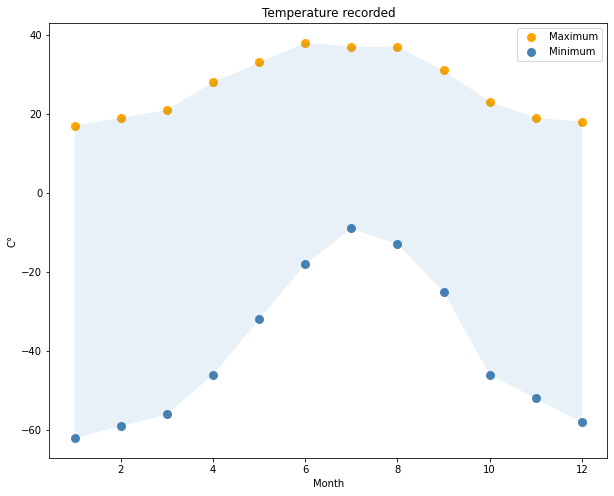

In [4]:
t_max = np.array([17,19,21,28,33,38,37,37,31,23,19,18])
t_min = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
month = np.arange(1,13)
with plt.rc_context({'figure.figsize' : [10,8]}):
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_title('Temperature recorded')
    ax.set_ylabel('C°')
    ax.set_xlabel('Month')
    ax.scatter(month,t_max,color='orange',label='Maximum',linewidth=3)
    ax.scatter(month,t_min,color='steelblue',label='Minimum',linewidth=3)
    ax.fill_between(month,t_max,t_min,alpha=0.1)
    ax.legend()
    plt.show()

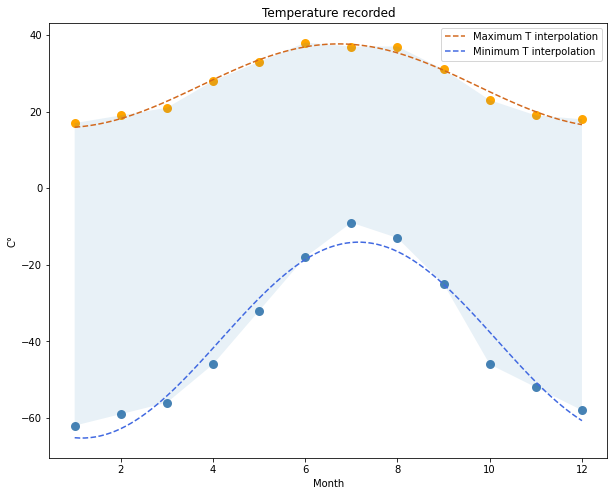

Angular phase shift for Tmax = 2.762779386493202 +- 0.05151239551410388
Angular phase shift for Tmin = 2.536293365438516 +- 0.07059726254251981
Consistent within standard deviation:  False


In [5]:
# a reasonable guess for the fitting function could be a sine/cosine function, since it 
# is actually the analytic result of a material subject to periodic heat source (i.e. the sun)

with plt.rc_context({'figure.figsize' : [10,8]}):
    # plotting data again
    fig = plt.figure()
    ax = fig.add_subplot()
    ax.set_title('Temperature recorded')
    ax.set_ylabel('C°')
    ax.set_xlabel('Month')
    ax.scatter(month,t_max,color='orange',linewidth=3)
    ax.scatter(month,t_min,color='steelblue',linewidth=3)
    ax.fill_between(month,t_max,t_min,alpha=0.1)

    
    def fitting_function(x,A,phi,C):
        return A*np.cos((2*np.pi/12)*x + phi) + C #fix the period to one year

    # set the bounds for the amplitude, forcing it to be positive and thus avoiding the algorithm's convergence
    # to a specular minima with negative amplitude but different phase value
    # this way we can easily compare the phase shifts of the two interpolations
    bounds = (np.array([0.,-np.inf,-np.inf]),np.array([np.inf,np.inf,np.inf]))
    # maximum temperature fit
    tmax_params,tmax_cov=curve_fit(fitting_function,month,t_max,bounds=bounds)
    tmax_stds =  np.sqrt(np.diag(tmax_cov))
    x=np.linspace(1,12,100)
    ax.plot(x,fitting_function(x,*tmax_params),linestyle='--',color='chocolate',label='Maximum T interpolation')
    # minimum temperature fit
    tmin_params,tmin_cov=curve_fit(fitting_function,month,t_min,bounds=bounds)
    tmin_stds =  np.sqrt(np.diag(tmin_cov))
    ax.plot(x,fitting_function(x,*tmin_params),linestyle='--',color='royalblue',label='Minimum T interpolation')
    

    ax.legend()
    plt.show()

print("Angular phase shift for Tmax = {} +- {}".format(tmax_params[1],tmax_stds[1]))
print("Angular phase shift for Tmin = {} +- {}".format(tmin_params[1],tmin_stds[1]))
print("Consistent within standard deviation: ",(abs(tmax_params[1]-tmin_params[1])<=(tmax_stds[1]+tmin_stds[1])))


3\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature name "residual" contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable "distances".

- Considering only the "residual" feature, create an histogram with the appropriate binning and display it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform a goodness-of-fit test. Is the p-value of the fit satisfactory?

In [ ]:
! wget -nc https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P ~/data/


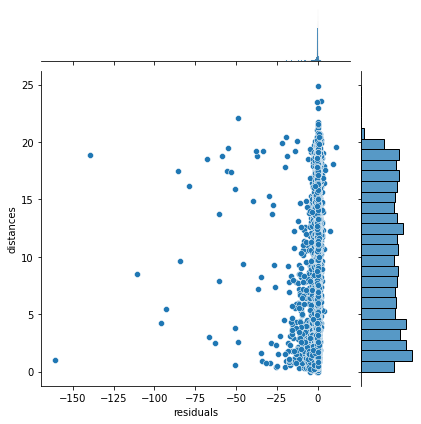

In [6]:
with open("/home/zano/data/residuals_261.pkl","rb") as f:
    data = pd.DataFrame(pickle.load(f).item())

import seaborn as sns
sns.jointplot(x='residuals',y='distances',data=data)




Fitted parameters:
[ 8.04776818e+03 -2.15429654e-02  5.93579602e-01  5.17854669e+00]


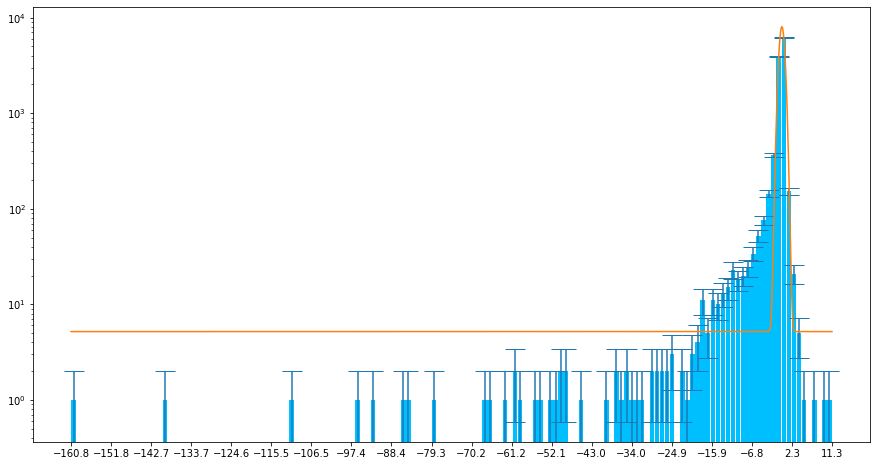

P-value: 0.0
Chi2 value: 8799.431713217724
Probability of getting less than this chi2 value given our model:  1.0
It's a bad fit


In [15]:
with plt.rc_context({'figure.figsize' : [15,8]}):
    fig,ax = plt.subplots()
    n_bins=150
    hist,bin,patches=ax.hist(data['residuals'],bins=n_bins,rwidth=0.9,color='deepskyblue')
    sigma = np.sqrt(hist)
    bin_centers = [(bin[i+1]+bin[i])/2 for i in range(len(hist))]
    ax.errorbar(bin_centers,hist,sigma,linestyle='',capsize=10)
    ax.set_xticks(bin)
    # ax.set_yscale('log')

    # fitting function
    from scipy.stats import norm
    def fit_func(x,a,x0,b,c):
        
        return a*np.exp(-((x-x0)**2)/(2*b**2)) + c


    mask = np.nonzero(hist)
    # guess = np.array([0.5,-160.,0.])
    bounds = (np.array([-20.,0.,-np.inf,-np.inf]),np.array([20.,np.inf,np.inf,np.inf]))
    fit_params,fit_cov=curve_fit(fit_func,np.array(bin_centers),hist)
    print("Fitted parameters:")
    print(fit_params)

    x = np.linspace(bin.min(),bin.max(),1000)

    ax.plot(x,fit_func(x,*fit_params))
    ax.set_xticks(np.linspace(bin.min(),bin.max(),20))
    ax.set_yscale('log')
    plt.show()


    # P VALUE TEST
    # using chi squared

    # basically, the chi2 distirbution chi2(x,df=N) gives the probability of having N random standard normal variables sum up (squared) to x
    #  so it's the probability of having tot errors from the interpolated distribution.
    from scipy.stats import chi2

    chisqrd=np.sum(((fit_func(np.array(bin_centers)[mask],*fit_params) - hist[mask])**2)/sigma[mask])

    ndof = len(hist) - 1
    pvalue = 1. - chi2.cdf(chisqrd, ndof)
    print("P-value:",pvalue)
    print("Chi2 value:",chisqrd)
    print("Probability of getting less than this chi2 value given our model: ",chi2.cdf(chisqrd,ndof))
    print("It's a bad fit")

4\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have?


- Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is necessary.

In [16]:
! wget -nc https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt -P ~/data/

File ‘/home/zano/data/munich_temperatures_average_with_bad_data.txt’ already there; not retrieving.



Fitted parameters for function #1:
a = 9.988133683452785 , b = 2.9082450533644226 , c = 9.38411487286978
R^2 = 0.6795934800804344

Fitted parameters for function #2:
a = 9.982200594181421 , b = 1.0014439397962849 , c = -15.328016206515231 , d = 9.39812378745645
R^2 = 0.6796593571459477



Average Munich temperature from data: 8.9 +-1.51e+02
Average Munich temperature predicted by our models: 9.4+-0.0161 (model 1) and 9.4+-0.0167 (model 2)



Hottest temperature predicted by our models: 1.9e+01 (1) and 1.9e+01 (2)
Coldest temperature predicted by our models: -0.6 (1) and -0.58 (2)
CL: 0.241 , additional parameter necessary: NO


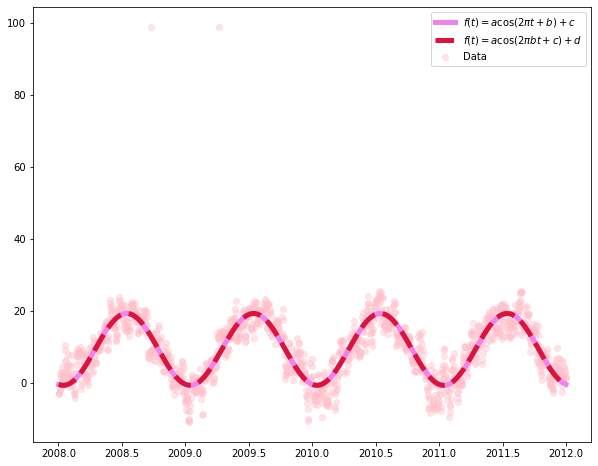

In [17]:
data = np.loadtxt("/home/zano/data/munich_temperatures_average_with_bad_data.txt")
# data is shaped like (Nsamples,2), with the [:,0] being the time and [:,1] being the temperature

def fit_func(t,a,b,c):
    return a*np.cos(2*np.pi*t + b) + c

def fit_func_d(t,a,b,c,d):
    return a*np.cos(2*np.pi*b*t + c) + d


mask = (data[:,0] >= 2008) & (data[:,0] <= 2012)

# first fit
guess = np.array([20.,1.,10.])
bounds=(np.array([0.,-np.inf,-np.inf]),np.array([np.inf,np.inf,np.inf])) #fixing amplitude to be positive
fit1params,fit1cov=curve_fit(fit_func,data[:,0][mask],data[:,1][mask],bounds=bounds,p0=guess)
print("Fitted parameters for function #1:")
print("a = {} , b = {} , c = {}".format(*fit1params))
RSS1 = np.sum((data[:,1][mask] - fit_func(data[:,0][mask],*fit1params))**2)
TSS1 = np.sum((np.mean(data[:,1][mask])-data[:,1][mask])**2)
print("R^2 = {}".format(1-RSS1/TSS1))
ndof_1 = 3 - 1 # degrees of freedom: n of parameters - 1 


# fit with additional parameter
guess_d = np.array([20.,1.,1.,10.])
bounds_d=(np.array([0.,-np.inf,-np.inf,-np.inf]),np.array([np.inf,np.inf,np.inf,np.inf])) #fixing amplitude to be positive
fit2params,fit2cov=curve_fit(fit_func_d,data[:,0][mask],data[:,1][mask],bounds=bounds_d,p0=guess_d)
print("\nFitted parameters for function #2:")
print("a = {} , b = {} , c = {} , d = {}".format(*fit2params))
RSS2 = np.sum((data[:,1][mask] - fit_func_d(data[:,0][mask],*fit2params))**2)
#TSS2 = np.sum((np.mean(data[:,1][mask])-data[:,1][mask])**2)
print("R^2 = {}".format(1-RSS2/TSS1))
ndof_2 = 4 - 1 # same

print("\n\n")
print("Average Munich temperature from data: {:.2} +-{:.3}".format(np.mean(data[:,1]),np.var(data[:,1])))
print("Average Munich temperature predicted by our models: {:.2}+-{:.3} (model 1) and {:.2}+-{:.3} (model 2)".format(fit1params[2],fit1cov[2,2],fit2params[3],fit2cov[3,3])) # using the pffset parameter from sine functions
print("\n\n")
print("Hottest temperature predicted by our models: {:2.2} (1) and {:2.2} (2)".format(fit_func(data[:,0][mask],*fit1params).max(),fit_func_d(data[:,0][mask],*fit2params).max()))
print("Coldest temperature predicted by our models: {:2.2} (1) and {:2.2} (2)".format(fit_func(data[:,0][mask],*fit1params).min(),fit_func_d(data[:,0][mask],*fit2params).min()))

# shamingly copy-pasting the fisher test implementation from lesson's notebook
def Ftest(ssr_1, ssr_2, ndof_1, ndof_2, nbins, verbose=False):
    from scipy import stats
    F = ((ssr_1 - ssr_2)/(ndof_2 - ndof_1)) / (ssr_2/(nbins - ndof_2))
    CL = 1. - stats.f.cdf(F, ndof_2 - ndof_1, nbins - ndof_2)
    if verbose: print("CL: %.3f" % CL, ", additional parameter necessary:", "YES" if CL < 0.10 else "NO")
    return CL

# run Ftest
Ftest(RSS1,RSS2,ndof_1,ndof_2,data[:,0].size,verbose=True)

with plt.rc_context({'figure.figsize' : [10,8]}):
    fig,ax=plt.subplots()
    ax.scatter(data[:,0][mask],data[:,1][mask],color='pink',alpha=0.4,label='Data')
    x = np.linspace(data[:,0][mask].min(),data[:,0][mask].max(),200) 
    ax.plot(x,fit_func(x,*fit1params),linewidth=5,color='violet',label='$f(t) = a \cos(2\pi t + b)+c$')
    ax.plot(x,fit_func_d(x,*fit2params),linewidth=5,color='crimson',linestyle='--',label='$f(t) = a \cos(2\pi b t + c)+d$')
    ax.legend()
    plt.show()
